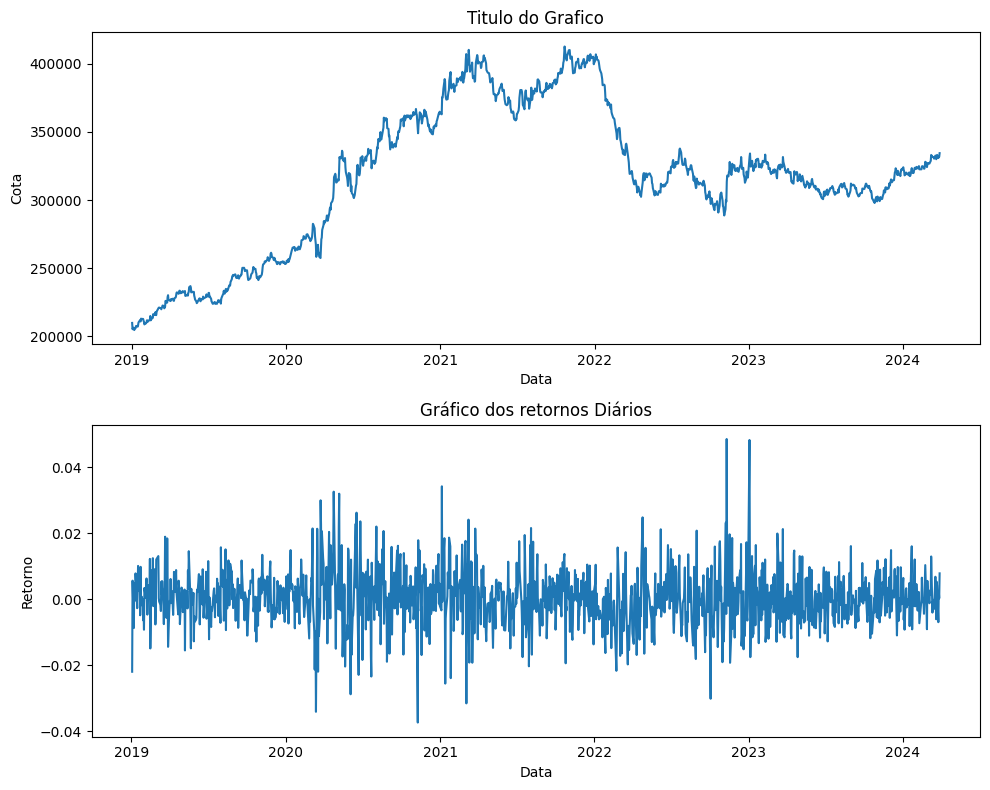

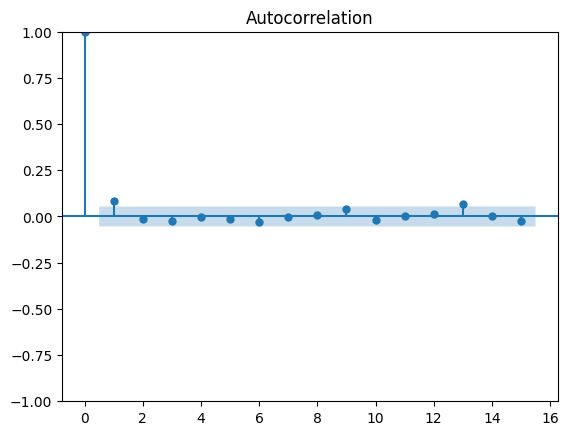

Iteration:      5,   Func. Count:     64,   Neg. LLF: 2.590667695712111e+18
Iteration:     10,   Func. Count:    137,   Neg. LLF: 245457779297982.16
Iteration:     15,   Func. Count:    208,   Neg. LLF: 12658362291126.34
Iteration:     20,   Func. Count:    280,   Neg. LLF: -4537.278432313951
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4537.278434651873
            Iterations: 24
            Function evaluations: 280
            Gradient evaluations: 20
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   min2   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4537.28
Distribution:                  Normal   AIC:                          -9066.56
Method:            Maximum Likelihood   BIC:                          -9045.76
                     

c:\Users\eduardomoreira\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.38e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




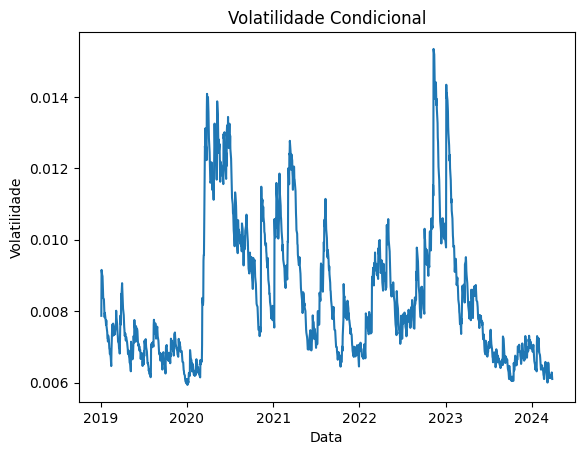

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model

# Ler o arquivo Excel e a planilha específica
pu = pd.read_excel("Carteiras Simuladas.xlsx",
                   sheet_name="Pu",)

# Converter a coluna 'Data' para datetime
pu['Data'] = pd.to_datetime(pu['Data'])

# Definir a coluna 'Data' como índice
pu.set_index('Data', inplace=True)

# Selecionar a coluna x (Python usa indexação baseada em 0, então a coluna #5 é a sexta coluna)
data_cota = pu.iloc[:, 6] 

# Plotar o gráfico
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(data_cota)
ax[0].set_title("Titulo do Grafico")
ax[0].set_xlabel("Data")
ax[0].set_ylabel("Cota")

# Calcular os retornos discretos
retorno = data_cota.pct_change().dropna()

ax[1].plot(retorno)
ax[1].set_title("Gráfico dos retornos Diários")
ax[1].set_xlabel("Data")
ax[1].set_ylabel("Retorno")

plt.tight_layout()
plt.show()

# ACF Plot
sm.graphics.tsa.plot_acf(retorno, lags=15)
plt.show()

# GARCH(1,1) Model
am = arch_model(retorno, vol='Garch', p=1, q=1,dist='gaussian')
res = am.fit(update_freq=5)
print(res.summary())

# Plot da volatilidade
fig, ax = plt.subplots()
ax.plot(res.conditional_volatility)
ax.set_title("Volatilidade Condicional")
ax.set_xlabel("Data")
ax.set_ylabel("Volatilidade")
plt.show()

In [15]:
type(retorno)

pandas.core.series.Series

In [ ]:
# Cria a carteira simulada
forecast_horizon = 450
forecasts = res.forecast(horizon=forecast_horizon, params=res.params, method='simulation')


In [ ]:
# Estima GARCH para a carteira simulada
am = arch_model(retorno, vol='Garch', p=1, q=1)
rolling_window = 21
forecasts = am.forecast(start=rolling_window, horizon=forecast_horizon, params=res.params, method='simulation')


In [ ]:
risco_estimado  = (np.sqrt(forecasts.variance.iloc[-1])*np.sqrt(252))*100

In [ ]:
risco_estimado

h.001     9.586956
h.002     9.688117
h.003     9.778335
h.004     9.883731
h.005     9.972874
           ...    
h.446    13.609037
h.447    13.625349
h.448    13.619660
h.449    13.602196
h.450    13.595431
Name: NaT, Length: 450, dtype: float64

In [ ]:
import plotly.express as px
vol_prev = (np.sqrt(forecasts.variance.iloc[-1])*np.sqrt(252))*100

vol_prev = pd.DataFrame(vol_prev)

vol_prev.reset_index(inplace=True)

vol_prev.columns = ['Id' , 'Vol']

vol_prev

fig = px.line(vol_prev, x = vol_prev.index, y=vol_prev['Vol'])

# Edit the layout
fig.update_layout(title='Previsão de Volatilide',
                   xaxis_title='Qtde de Dias Futuros',
                   yaxis_title='Volatilidade Prevista em % ao ano')

fig.show()